# Prepare Dataset

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
!git clone https://github.com/WongKinYiu/yolov7.git


Cloning into 'yolov7'...
remote: Enumerating objects: 1197, done.
remote: Total 1197 (delta 0), reused 0 (delta 0), pack-reused 1197 (from 1)
Receiving objects: 100% (1197/1197), 74.23 MiB | 12.62 MiB/s, done.
Resolving deltas: 100% (519/519), done.


In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 1.8 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 873.3/873.3 kB 50.4 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd /content/drive/MyDrive/NTI_GP

/content/drive/MyDrive/NTI_GP


In [ ]:

from roboflow import Roboflow
rf = Roboflow(api_key="dZtrnF63aDa6P0VhuGkj")
project = rf.workspace("fyp-pz5zs").project("violence-nonviolence-behavior")
version = project.version(34)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.96, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Violence-NonViolence-Behavior-34 in yolov8:: 100%|██████████| 12542/12542 [01:41<00:00, 123.40it/s]


# Train Yolov8

In [ ]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')  # load a pretrained YOLOv8n detection model
model.train(data='/content/drive/MyDrive/NTI_GP/Violence-NonViolence-Behavior-34/data.yaml', epochs=30)  # train the model

100%|██████████| 6.25M/6.25M [00:00<00:00, 175MB/s]


Ultralytics YOLOv8.2.96 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/NTI_GP/Violence-NonViolence-Behavior-34/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=

100%|██████████| 755k/755k [00:00<00:00, 66.8MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/NTI_GP/Violence-NonViolence-Behavior-34/train/labels... 5070 images, 78 backgrounds, 0 corrupt: 100%|██████████| 5070/5070 [01:41<00:00, 50.16it/s] 


train: New cache created: /content/drive/MyDrive/NTI_GP/Violence-NonViolence-Behavior-34/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/drive/MyDrive/NTI_GP/Violence-NonViolence-Behavior-34/valid/labels... 599 images, 0 backgrounds, 0 corrupt: 100%|██████████| 599/599 [00:09<00:00, 64.28it/s] 


val: New cache created: /content/drive/MyDrive/NTI_GP/Violence-NonViolence-Behavior-34/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.29G      1.271       2.28      1.451         28        640: 100%|██████████| 317/317 [02:14<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:12<00:00,  1.57it/s]


                   all        599        942      0.478      0.433      0.425      0.221

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.19G      1.457      2.059      1.586         40        640: 100%|██████████| 317/317 [02:17<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:12<00:00,  1.52it/s]


                   all        599        942       0.48      0.501      0.485      0.254

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.16G      1.499      1.983      1.621         44        640: 100%|██████████| 317/317 [02:23<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.73it/s]

                   all        599        942      0.547      0.481        0.5      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.16G      1.481      1.903      1.603         36        640: 100%|██████████| 317/317 [02:13<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:12<00:00,  1.57it/s]

                   all        599        942      0.601      0.565      0.589      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.18G      1.427      1.843      1.564         45        640: 100%|██████████| 317/317 [02:47<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.70it/s]

                   all        599        942      0.609      0.583      0.601      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.18G      1.388      1.764      1.535         26        640: 100%|██████████| 317/317 [02:07<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.86it/s]

                   all        599        942      0.614       0.54      0.594      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.24G       1.35      1.717      1.513         45        640: 100%|██████████| 317/317 [02:08<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.89it/s]

                   all        599        942      0.575      0.643      0.655      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.16G      1.313      1.645       1.49         44        640: 100%|██████████| 317/317 [02:05<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.43it/s]

                   all        599        942      0.628      0.622      0.622      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.16G      1.306      1.625      1.482         34        640: 100%|██████████| 317/317 [02:02<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.87it/s]


                   all        599        942       0.62      0.605      0.633      0.401

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.16G      1.256      1.566      1.444         54        640: 100%|██████████| 317/317 [02:01<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.17it/s]

                   all        599        942      0.644       0.63      0.677      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.24G      1.242      1.521      1.442         42        640: 100%|██████████| 317/317 [02:03<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.81it/s]

                   all        599        942      0.631      0.622      0.656      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.16G       1.23      1.482      1.424         36        640: 100%|██████████| 317/317 [02:03<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.44it/s]

                   all        599        942      0.657      0.673      0.692      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.16G      1.198      1.447        1.4         41        640: 100%|██████████| 317/317 [02:03<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.93it/s]


                   all        599        942      0.701      0.679      0.726      0.489

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.16G      1.178      1.418      1.396         44        640: 100%|██████████| 317/317 [02:02<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.28it/s]

                   all        599        942      0.685      0.672      0.732        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.24G      1.182      1.408      1.392         38        640: 100%|██████████| 317/317 [02:05<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.86it/s]

                   all        599        942      0.687      0.682      0.734      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.16G      1.155      1.366      1.383         34        640: 100%|██████████| 317/317 [02:03<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.15it/s]

                   all        599        942      0.701      0.678      0.737      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.19G      1.142       1.34      1.369         36        640: 100%|██████████| 317/317 [02:00<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.90it/s]

                   all        599        942      0.732      0.653      0.746      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.16G      1.131      1.328      1.369         47        640: 100%|██████████| 317/317 [02:01<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.39it/s]

                   all        599        942       0.72      0.727      0.781      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.26G      1.108      1.271      1.339         52        640: 100%|██████████| 317/317 [02:03<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.85it/s]

                   all        599        942      0.722      0.739      0.789      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.16G      1.087      1.249      1.325         43        640: 100%|██████████| 317/317 [02:04<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.83it/s]

                   all        599        942      0.724      0.738      0.783      0.553


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.23G      1.006      1.092      1.308         30        640: 100%|██████████| 317/317 [02:01<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.64it/s]

                   all        599        942      0.765      0.745       0.81      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.14G     0.9803      1.047      1.294         23        640: 100%|██████████| 317/317 [01:59<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.96it/s]

                   all        599        942      0.771      0.759      0.819      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.22G     0.9567     0.9967      1.274         19        640: 100%|██████████| 317/317 [01:59<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.70it/s]

                   all        599        942      0.732      0.715      0.796      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.16G     0.9374     0.9675       1.26         24        640: 100%|██████████| 317/317 [01:58<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.13it/s]


                   all        599        942      0.779       0.76      0.824      0.601

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.14G     0.9065     0.9385      1.238         21        640: 100%|██████████| 317/317 [01:56<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.92it/s]

                   all        599        942      0.775      0.748      0.833      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.14G     0.8933     0.8949      1.224         28        640: 100%|██████████| 317/317 [01:55<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.19it/s]

                   all        599        942      0.806      0.766      0.845      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.22G     0.8721     0.8796      1.211         27        640: 100%|██████████| 317/317 [01:57<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.88it/s]

                   all        599        942      0.776      0.768      0.834      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      2.14G     0.8524     0.8398       1.19         20        640: 100%|██████████| 317/317 [01:59<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  3.03it/s]


                   all        599        942      0.785      0.776       0.84      0.629

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      2.14G     0.8469     0.8205       1.18         17        640: 100%|██████████| 317/317 [01:57<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.44it/s]

                   all        599        942       0.78      0.775      0.839      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.16G     0.8158     0.7945      1.168         16        640: 100%|██████████| 317/317 [01:55<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.93it/s]

                   all        599        942      0.793       0.77      0.844      0.635



30 epochs completed in 1.125 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.96 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.17it/s]


                   all        599        942      0.794       0.77      0.844      0.635
           nonviolence        340        592      0.723      0.679      0.774      0.572
              violence        336        350      0.865       0.86      0.915      0.698
Speed: 0.3ms preprocess, 2.4ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7eecf0fafe20>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

# Test Model Results

In [ ]:
# Define path to video file
source = "/content/violence.mp4"

# Run inference on the source
results = model(source, stream=True)  # generator of Results objects

### Extract Frames

In [ ]:
import cv2
import os

# Initialize a list to hold frames (optional if you want to save them directly)
frames = []

# Specify the output folder where the frames will be saved
output_folder = 'extracted_frames'
os.makedirs(output_folder, exist_ok=True)  # Create the folder if it doesn't exist

# Process results list
for idx, result in enumerate(results):
    # Extract result details (if needed)
    boxes = result.boxes
    masks = result.masks
    keypoints = result.keypoints
    probs = result.probs
    obb = result.obb

    # Use result.plot() to get the annotated image as a NumPy array
    annotated_frame = result.plot()
    frames.append(annotated_frame)

    # Construct the filename for the image
    image_filename = os.path.join(output_folder, f'frame_{idx:04d}.png')  # e.g., frame_0001.png

    # Save the frame as an image file
    cv2.imwrite(image_filename, annotated_frame)

print(f"Frames have been saved to the folder: {output_folder}")



video 1/1 (frame 1/162) /content/violence.mp4: 384x640 2 violences, 47.8ms
video 1/1 (frame 2/162) /content/violence.mp4: 384x640 1 violence, 8.0ms
video 1/1 (frame 3/162) /content/violence.mp4: 384x640 3 violences, 11.2ms
video 1/1 (frame 4/162) /content/violence.mp4: 384x640 3 violences, 11.2ms
video 1/1 (frame 5/162) /content/violence.mp4: 384x640 2 violences, 7.7ms
video 1/1 (frame 6/162) /content/violence.mp4: 384x640 2 violences, 8.2ms
video 1/1 (frame 7/162) /content/violence.mp4: 384x640 1 violence, 6.7ms
video 1/1 (frame 8/162) /content/violence.mp4: 384x640 2 violences, 7.9ms
video 1/1 (frame 9/162) /content/violence.mp4: 384x640 2 violences, 7.6ms
video 1/1 (frame 10/162) /content/violence.mp4: 384x640 3 violences, 7.2ms
video 1/1 (frame 11/162) /content/violence.mp4: 384x640 1 violence, 8.8ms
video 1/1 (frame 12/162) /content/violence.mp4: 384x640 1 violence, 6.7ms
video 1/1 (frame 13/162) /content/violence.mp4: 384x640 1 violence, 11.6ms
video 1/1 (frame 14/162) /content/

In [ ]:
!pip install transformers

### Generate Cpations

In [ ]:
from transformers import AutoProcessor, Blip2ForConditionalGeneration
import torch
# Load BLIP-2 processor and model
processor = AutoProcessor.from_pretrained("Salesforce/blip2-opt-2.7b")
model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b", torch_dtype=torch.float16).to("cuda")



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
import os
import cv2
import torch
from ultralytics import YOLO
from transformers import AutoProcessor, Blip2ForConditionalGeneration
# Load YOLOv8 model for violence detection
yolo_model = YOLO('/content/drive/MyDrive/NTI_GP/runs/detect/train/weights/best.pt')

# Load BLIP-2 processor and model for caption generation
processor = AutoProcessor.from_pretrained("Salesforce/blip2-opt-2.7b")
caption_model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b", torch_dtype=torch.float16).to("cuda")

# Function to generate caption using BLIP-2
def generate_caption(frame):
    inputs = processor(images=frame, return_tensors="pt").to("cuda", torch.float16)
    with torch.no_grad():
        generated_ids = caption_model.generate(**inputs, max_length=50)
        caption = processor.decode(generated_ids[0], skip_special_tokens=True)
    return caption

# Function to overlay caption on the frame
def overlay_caption_on_frame(frame, caption):
    # Set font and positioning for the caption
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1
    font_thickness = 2
    caption_color = (255, 255, 255)  # White text
    text_position = (50, 50)  # Position of the text on the frame

    # Draw the caption on the frame
    cv2.putText(frame, caption, text_position, font, font_scale, caption_color, font_thickness, cv2.LINE_AA)
    return frame

# Define folders and process results
output_folder = 'processed_frames'
captions_file = 'captions.txt3'  # Ensure correct path for captions
os.makedirs(output_folder, exist_ok=True)

# Open the file to save captions
with open(captions_file, 'w') as f:
    # Load frames from the directory
    frames_folder = '/content/drive/MyDrive/NTI_GP/extracted_frames'
    frame_files = [os.path.join(frames_folder, file) for file in os.listdir(frames_folder) if file.endswith(('.png', '.jpg'))]

    for idx, frame_path in enumerate(frame_files):
        # Load the frame
        frame = cv2.imread(frame_path)

        if frame is None:
            print(f"Error loading frame {frame_path}. Skipping.")
            continue

        # Generate a caption using BLIP-2
        caption = generate_caption(frame)

        if caption:  # Check if the caption is not empty
            print(f"Generated caption for frame {idx}: {caption}")

            # Overlay caption on the frame
            annotated_frame_with_caption = overlay_caption_on_frame(frame, caption)

            # Save the frame with caption overlay
            frame_filename = os.path.join(output_folder, f'frame_{idx:04d}.png')
            cv2.imwrite(frame_filename, annotated_frame_with_caption)

            # Save the caption in the captions file
            f.write(f"Frame {idx:04d}: {caption}\n")
        else:
            print(f"Warning: No caption generated for frame {idx}")

print(f"Processed frames saved to {output_folder} and captions saved to {captions_file}")

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Generated caption for frame 0: a group of people are standing around a car

Generated caption for frame 1: a group of people are fighting in the street

Generated caption for frame 2: a group of people are shown in a video with a yellow box

Generated caption for frame 3: a group of people are standing around a building

Generated caption for frame 4: a group of people are standing around a building

Generated caption for frame 5: a group of people are standing in front of a building

Generated caption for frame 6: a group of people are standing around a blue door

Generated caption for frame 7: two people are fighting in the street with one person being hit

Generated caption for frame 8: a group of people are standing in front of a building

Generated caption for frame 9: a group of people are standing in front of a car

Generated caption for frame 10: a group of people are standing around a blue door

Generated caption for frame 11: a group of people are fighting in a parking lot

G

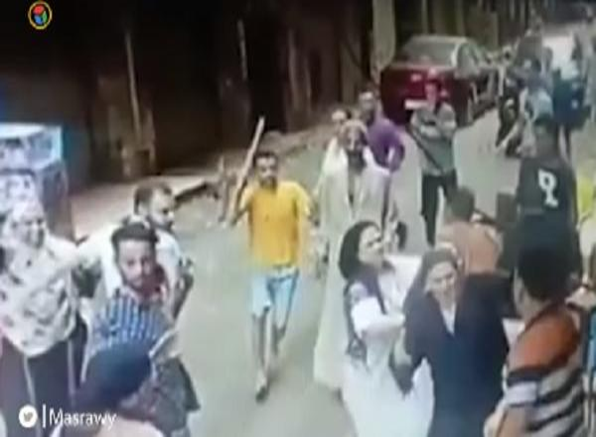

In [ ]:
import requests
from PIL import Image

url = 'https://www.coptstoday.com/img/2022/9/coptstoday-11663836677.jpg'
image = Image.open(requests.get(url, stream=True).raw).convert('RGB')
display(image.resize((596, 437)))


In [ ]:
from transformers import AutoProcessor, Blip2ForConditionalGeneration
import torch

processor = AutoProcessor.from_pretrained("Salesforce/blip2-opt-2.7b")
model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b", torch_dtype=torch.float16)


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)


Blip2ForConditionalGeneration(
  (vision_model): Blip2VisionModel(
    (embeddings): Blip2VisionEmbeddings(
      (patch_embedding): Conv2d(3, 1408, kernel_size=(14, 14), stride=(14, 14))
    )
    (encoder): Blip2Encoder(
      (layers): ModuleList(
        (0-38): 39 x Blip2EncoderLayer(
          (self_attn): Blip2Attention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=1408, out_features=4224, bias=True)
            (projection): Linear(in_features=1408, out_features=1408, bias=True)
          )
          (layer_norm1): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
          (mlp): Blip2MLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=1408, out_features=6144, bias=True)
            (fc2): Linear(in_features=6144, out_features=1408, bias=True)
          )
          (layer_norm2): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((

In [ ]:
inputs = processor(image, return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs, max_new_tokens=20)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

Both `max_new_tokens` (=20) and `max_length`(=51) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


a group of people are running down the street


### Trying another video ####

In [ ]:
source="/content/V_10.mp4"
results_2 = yolo_model(source, stream=True)  # generator of Results objects

In [ ]:
import cv2
import os

# Initialize a list to hold frames (optional if you want to save them directly)
frames = []

# Specify the output folder where the frames will be saved
output_folder = 'extracted_frames_new'
os.makedirs(output_folder, exist_ok=True)  # Create the folder if it doesn't exist

# Process results list
for idx, result in enumerate(results_2):
    # Extract result details (if needed)
    boxes = result.boxes
    masks = result.masks
    keypoints = result.keypoints
    probs = result.probs
    obb = result.obb

    # Use result.plot() to get the annotated image as a NumPy array
    annotated_frame = result.plot()
    frames.append(annotated_frame)

    # Construct the filename for the image
    image_filename = os.path.join(output_folder, f'frame_{idx:04d}.png')  # e.g., frame_0001.png

    # Save the frame as an image file
    cv2.imwrite(image_filename, annotated_frame)

print(f"Frames have been saved to the folder: {output_folder}")



video 1/1 (frame 1/96) /content/V_10.mp4: 384x640 2 nonviolences, 1 violence, 85.0ms
video 1/1 (frame 2/96) /content/V_10.mp4: 384x640 2 nonviolences, 1 violence, 10.9ms
video 1/1 (frame 3/96) /content/V_10.mp4: 384x640 2 nonviolences, 1 violence, 19.3ms
video 1/1 (frame 4/96) /content/V_10.mp4: 384x640 2 nonviolences, 1 violence, 16.1ms
video 1/1 (frame 5/96) /content/V_10.mp4: 384x640 2 nonviolences, 1 violence, 11.7ms
video 1/1 (frame 6/96) /content/V_10.mp4: 384x640 2 nonviolences, 1 violence, 21.7ms
video 1/1 (frame 7/96) /content/V_10.mp4: 384x640 2 nonviolences, 1 violence, 10.9ms
video 1/1 (frame 8/96) /content/V_10.mp4: 384x640 2 nonviolences, 1 violence, 11.3ms
video 1/1 (frame 9/96) /content/V_10.mp4: 384x640 2 nonviolences, 1 violence, 10.6ms
video 1/1 (frame 10/96) /content/V_10.mp4: 384x640 2 nonviolences, 1 violence, 13.8ms
video 1/1 (frame 11/96) /content/V_10.mp4: 384x640 2 nonviolences, 1 violence, 11.2ms
video 1/1 (frame 12/96) /content/V_10.mp4: 384x640 2 nonviolen

In [ ]:
import os
import cv2
import torch
from ultralytics import YOLO
from transformers import AutoProcessor, Blip2ForConditionalGeneration
# Load YOLOv8 model for violence detection
yolo_model = YOLO('/content/drive/MyDrive/NTI_GP/runs/detect/train/weights/best.pt')

# Load BLIP-2 processor and model for caption generation
processor = AutoProcessor.from_pretrained("Salesforce/blip2-opt-2.7b")
caption_model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b", torch_dtype=torch.float16).to("cuda")

# Function to generate caption using BLIP-2
def generate_caption(frame):
    inputs = processor(images=frame, return_tensors="pt").to("cuda", torch.float16)
    with torch.no_grad():
        generated_ids = caption_model.generate(**inputs, max_length=50)
        caption = processor.decode(generated_ids[0], skip_special_tokens=True)
    return caption

# Function to overlay caption on the frame
def overlay_caption_on_frame(frame, caption):
    # Set font and positioning for the caption
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1
    font_thickness = 2
    caption_color = (255, 255, 255)  # White text
    text_position = (50, 50)  # Position of the text on the frame

    # Draw the caption on the frame
    cv2.putText(frame, caption, text_position, font, font_scale, caption_color, font_thickness, cv2.LINE_AA)
    return frame

# Define folders and process results
output_folder = 'processed_frames'
captions_file = 'captions.txt3'  # Ensure correct path for captions
os.makedirs(output_folder, exist_ok=True)

# Open the file to save captions
with open(captions_file, 'w') as f:
    # Load frames from the directory
    frames_folder = '/content/extracted_frames_new'
    frame_files = [os.path.join(frames_folder, file) for file in os.listdir(frames_folder) if file.endswith(('.png', '.jpg'))]

    for idx, frame_path in enumerate(frame_files):
        # Load the frame
        frame = cv2.imread(frame_path)

        if frame is None:
            print(f"Error loading frame {frame_path}. Skipping.")
            continue

        # Generate a caption using BLIP-2
        caption = generate_caption(frame)

        if caption:  # Check if the caption is not empty
            print(f"Generated caption for frame {idx}: {caption}")

            # Overlay caption on the frame
            annotated_frame_with_caption = overlay_caption_on_frame(frame, caption)

            # Save the frame with caption overlay
            frame_filename = os.path.join(output_folder, f'frame_{idx:04d}.png')
            cv2.imwrite(frame_filename, annotated_frame_with_caption)

            # Save the caption in the captions file
            f.write(f"Frame {idx:04d}: {caption}\n")
        else:
            print(f"Warning: No caption generated for frame {idx}")

print(f"Processed frames saved to {output_folder} and captions saved to {captions_file}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Generated caption for frame 0: a man sitting on a bench with a yellow box

Generated caption for frame 1: a man sitting at a table with a camera in front of him

Generated caption for frame 2: a man sitting on a bench with a cell phone

Generated caption for frame 3: a man sitting on a bench with a phone in his hand

Generated caption for frame 4: a man sitting on a bench with a camera in front of him

Generated caption for frame 5: a man sitting at a table with a camera in front of him

Generated caption for frame 6: a man sitting on a bench with his back to the camera

Generated caption for frame 7: a man sitting on a bench with a yellow box

Generated caption for frame 8: a man sitting on a bench with a camera in front of him

Generated caption for frame 9: a man sitting on a bench with a camera in front of him

Generated caption for frame 10: a man sitting on a bench with a camera in front of him

Generated caption for frame 11: a man sitting on a bench with a phone in his hand

Ge